# Prêmio Nobel

O Prêmio Nobel é uma das mais prestigiadas premiações do mundo. Todos os anos, pessoas que fizeram pesquisas de grande valor para o bem do ser humano em diversas áreas, como Química, Física, Medicina, Literatura, Economia e Paz, são escolhidas e premiadas.

A história do Prêmio se inicia com seu fundador, Alfred Nobel, o inventor da dinamite. Após sentir o desgosto das mortes e da destruição causada pela sua invenção, Nobel propôs a criação de uma premiação que prestigiasse aqueles que, no futuro, servissem ao bem da humanidade. Assim, Alfred Nobel deixou sua herança de 32 milhões de coroas suecas para a criação de uma instituição que teria a função de administrar a premiação: a Fundação Nobel.

A primeira cerimônia do Prêmio Nobel ocorreu em 1901, no Conservatório Real de Estocolmo. Atualmente, a cerimônia ocorre no dia da morte de Alfred Nobel, 10 de dezembro, em Oslo, na Noruega, e Estocolmo, na Suécia. O premiado é condecorado com uma medalha de ouro, diploma e uma quantia que ultrapassa US$1 milhão. As premiações de todas as categorias não ocorrem, necessariamente, em todos os anos; isso ocorre com maior freqüência no Prêmio Nobel de Paz.

No primeiros anos do prêmio existia um eurocentrismo e uma predominância masculina, será que isso mudou?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv("nobel.csv")


nobel.head(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# Quem ganha o prêmio?

Apenas olhando para o primeiro par de vencedores do prêmio Nobel, como também são chamados, já vemos uma celebridade: Wilhelm Conrad Röntgen, o cara que descobriu o raio-X. E, na verdade, vemos que todos os vencedores de 1901 eram caras vindos da Europa. Mas isso foi em 1901, olhando para todos os vencedores no conjunto de dados, de 1901 a 2016, qual sexo e qual país é o mais comumente representado?

In [2]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel["sex"].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel["birth_country"].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

# Dominância dos EUA, desde quando?


Não é tão surpreendente, talvez: o prêmio Nobel mais comum entre 1901 e 2016 foi um homem nascido nos Estados Unidos da América. Mas em 1901 todos os vencedores eram europeus. Quando os EUA começaram a dominar as paradas do Prêmio Nobel?

In [3]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["birth_country"] == "United States of America"
nobel['decade'] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


# Visualizando o cresmimento dos EUA nos ganhadores do prêmio

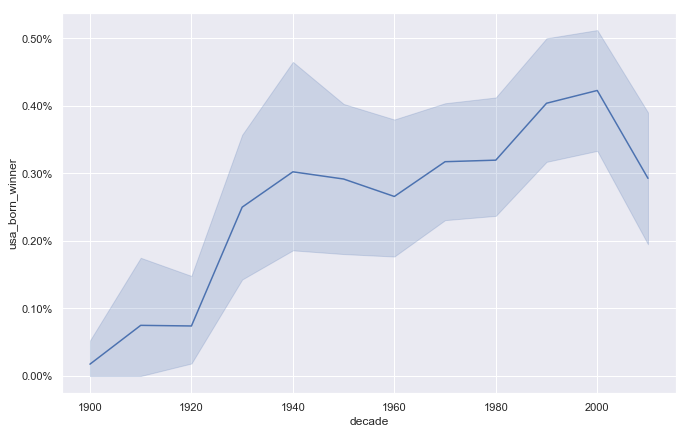

In [4]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x=nobel["decade"], y=nobel["usa_born_winner"])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())


# Qual gênero é predominante?


Os EUA tornaram-se os vencedores dominantes do Prêmio Nobel em 1930 e mantiveram a posição de liderança desde então. Mas um grupo que estava na liderança desde o início e nunca parece deixar ir, são homens. Talvez não seja um choque que haja algum desequilíbrio entre quantos vencedores de prêmios masculinos e femininos existem, mas quão significativo é esse desequilíbrio? E é melhor ou pior dentro de categorias específicas de prêmios, como física, medicina, literatura etc.?

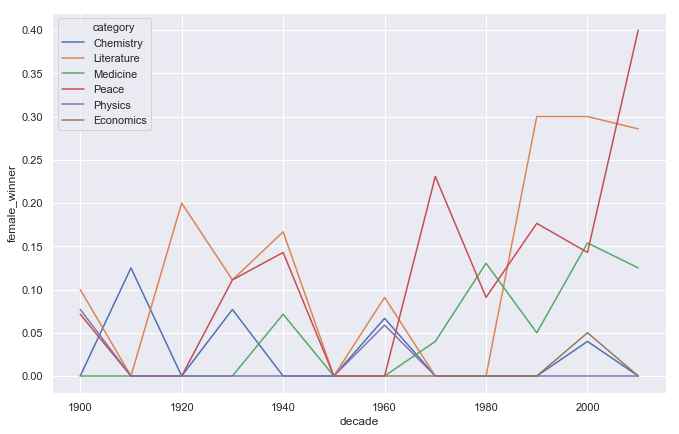

In [5]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)

# Primeira mulher que ganhou um Nobel

O plot acima é um pouco confuso, pois as linhas estão superplotando. Mas mostra algumas tendências e padrões interessantes. No geral, o desequilíbrio é muito grande, com a física, a economia e a química tendo o maior desequilíbrio. A medicina tem uma tendência positiva, e desde a década de 1990 o prêmio de literatura também está mais equilibrado. O grande outlier é o prêmio da paz durante a década de 2010, mas tenha em mente que isso abrange apenas os anos de 2010 a 2016.

Dado este desequilíbrio, quem foi a primeira mulher a receber um Prêmio Nobel? E em qual categoria?

In [6]:
# Picking out the first woman to win a Nobel Prize
df1 = nobel[nobel["sex"] == "Female"]
df1.nsmallest(1, "year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# 2x Premiado

Para a maioria dos cientistas / escritores / ativistas, um Prêmio Nobel seria a maior conquista de uma longa carreira. Mas para algumas pessoas, uma não é suficiente e poucas conseguiram mais de uma vez. Quem são? 

In [7]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby("full_name").filter(lambda x: len(x) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


# Qual a idade dos vencedores?

A lista de vencedores repetidos contém alguns nomes ilustres! Voltamos a nos encontrar com Marie Curie, que recebeu o prêmio em física pela descoberta da radiação e em química pelo isolamento do rádio e do polônio. John Bardeen conseguiu duas vezes em física para transistores e supercondutividade, Frederick Sanger conseguiu duas vezes em química, e Linus Carl Pauling conseguiu o primeiro em química e mais tarde em paz por seu trabalho na promoção do desarmamento nuclear. Também aprendemos que as organizações também recebem o prêmio, pois tanto a Cruz Vermelha quanto o ACNUR conseguiram isso duas vezes.

Mas quantos anos você tem quando recebe o prêmio?

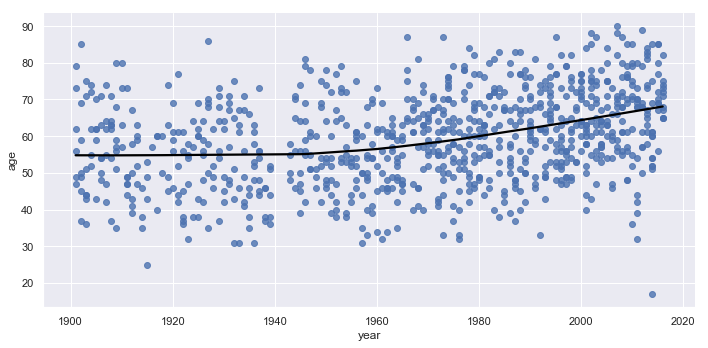

In [8]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel["birth_date"])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"})

# Diferença de idade entre as categorias


<p> O enredo acima nos mostra muito! Vemos que as pessoas costumam ter cerca de 55 anos quando recebem o preço, mas hoje a média está mais próxima de 65. Mas há uma grande disseminação nas idades dos laureados e, embora a maioria tenha mais de 50 anos, alguns são muito jovens. </p>
<p> Também vemos que a densidade de pontos é muito alta hoje em dia do que no início dos anos 1900 - hoje em dia muitos dos prêmios são compartilhados e, portanto, há muitos mais vencedores. Vimos também que houve uma interrupção nos prêmios concedidos em torno da Segunda Guerra Mundial (1939-1945). </p>
<p> Vamos analisar as tendências de idade em diferentes categorias de prêmios. </p>

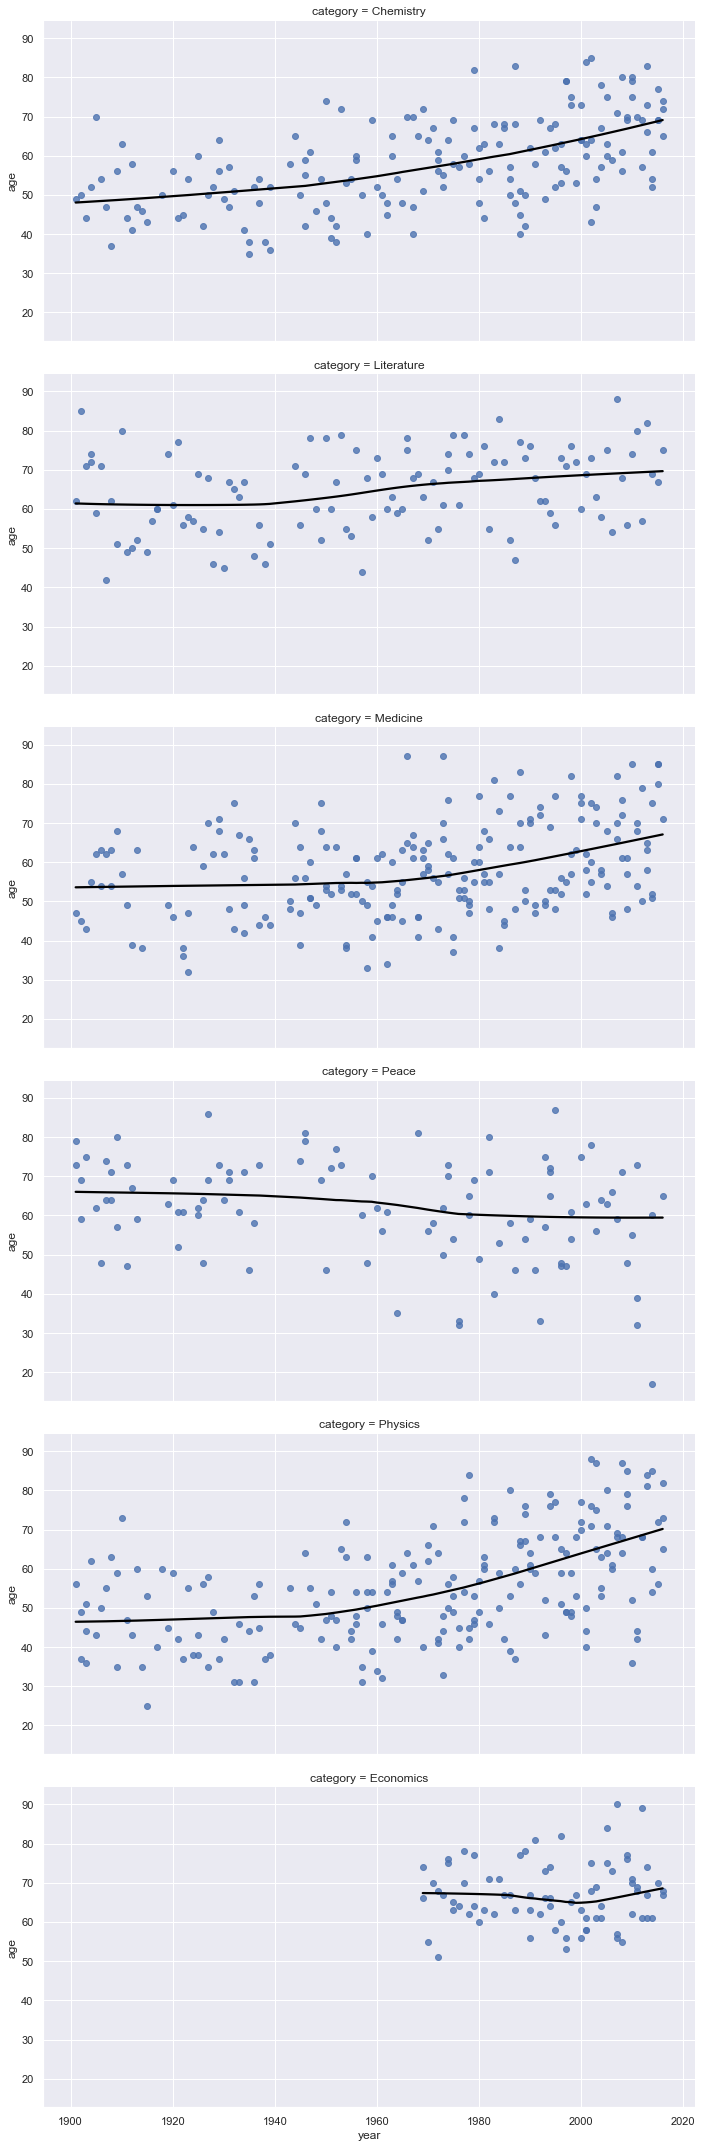

In [9]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x="year", y="age", data=nobel, row="category", lowess=True, aspect=2, line_kws={"color" : "black"})

# Os premiados mais velho e mais novo

Vemos que os vencedores dos prêmios de química, medicina e física ficaram mais velhos ao longo do tempo. A tendência é mais forte para a física: a idade média costumava ser inferior a 50 e agora é quase 70. A literatura e a economia são mais estáveis. Também vemos que a economia é uma categoria mais nova. Mas a paz mostra uma tendência oposta onde os vencedores estão ficando mais jovens! 
Na categoria da paz, nós também somos um vencedor perto de 2010 que parece excepcionalmente jovem. Isso levanta as questões, quem são as pessoas mais velhas e mais jovens que já ganharam um Prêmio Nobel? 

In [10]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "age"))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, "age")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


<p><img src="https://rlsh.fandom.com/wiki/Malala_Yousafzai?file=Malala.png"></p>
Malala Yousafzai é uma ativista paquistanesa. Foi a pessoa mais nova a ser laureada com um prémio Nobel.[3] É conhecida principalmente pela defesa dos direitos humanos das mulheres e do acesso à educação na sua região natal do vale do Swat na província de Khyber Pakhtunkhwa, no nordeste do Paquistão, onde os talibãs locais impedem as jovens de frequentar a escola. Desde então, o ativismo de Malala tornou-se um movimento internacional.